In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('/Users/kushal/Downloads/digit-recognizer/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)


In [6]:
data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]


In [7]:


def init_params():
    w1 = np.random.randn(10, 784) * 0.01  # Scaled for better stability
    b1 = np.zeros((10, 1))  # Initialized as zeros for stability
    w2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Stable softmax
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, X):
    Z1 = np.dot(w1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(w2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0  # Returns a binary mask

def back_prop(Z1, A1, Z2, A2, w2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ2 = A2 - one_hot_Y
    dw2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # Fixed axis

    dZ1 = np.dot(w2.T, dZ2) * deriv_ReLU(Z1)
    dw1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # Fixed axis

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)  # Fixed axis for batch predictions

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)  # More efficient than sum

def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print('Iteration:', i)
            print('Accuracy:', get_accuracy(get_predictions(A2), Y))
    
    return w1, b1, w2, b2

In [8]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,500,0.1)

Iteration: 0
Accuracy: 0.07558536585365853
Iteration: 10
Accuracy: 0.11160975609756098
Iteration: 20
Accuracy: 0.11160975609756098
Iteration: 30
Accuracy: 0.11160975609756098
Iteration: 40
Accuracy: 0.11160975609756098
Iteration: 50
Accuracy: 0.11160975609756098
Iteration: 60
Accuracy: 0.11160975609756098
Iteration: 70
Accuracy: 0.11160975609756098
Iteration: 80
Accuracy: 0.11160975609756098
Iteration: 90
Accuracy: 0.11160975609756098
Iteration: 100
Accuracy: 0.11160975609756098
Iteration: 110
Accuracy: 0.11160975609756098
Iteration: 120
Accuracy: 0.11160975609756098
Iteration: 130
Accuracy: 0.11160975609756098
Iteration: 140
Accuracy: 0.11160975609756098
Iteration: 150
Accuracy: 0.11160975609756098
Iteration: 160
Accuracy: 0.11160975609756098
Iteration: 170
Accuracy: 0.11160975609756098
Iteration: 180
Accuracy: 0.11160975609756098
Iteration: 190
Accuracy: 0.11160975609756098
Iteration: 200
Accuracy: 0.11160975609756098
Iteration: 210
Accuracy: 0.11160975609756098
Iteration: 220
Accura

In [9]:

def make_predictions(X, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, X_train, Y_train, w1, b1, w2, b2):
    current_image = X_train[:, index, None]  # Extract single image column vector
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = Y_train[index]

    print(f'Prediction: {prediction}')
    print(f'Label: {label}')

    current_image = current_image.reshape((28, 28))  # Reshape back to 28x28 image
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction: [1]
Label: 1


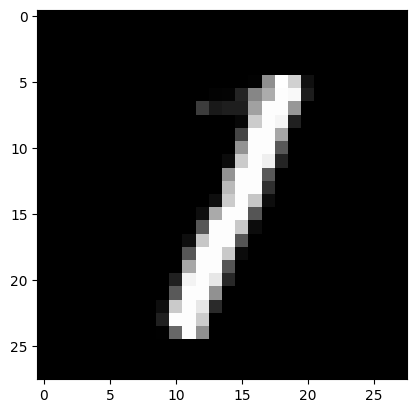

In [16]:
test_prediction(540, X_train,Y_train, w1, b1, w2, b2)